In [177]:
import tweepy 
import json
import pandas as pd
import numpy as np
import sklearn
global dataframe    
dataframe=pd.DataFrame()

class listener(tweepy.StreamListener):
    """tweepy.StreamListener is a class provided by tweepy used to access
    the Twitter Streaming API to collect tweets in real-time.
    """
    def __init__(self):
        super().__init__()
        self.max_tweets = 500
        self.tweet_count = 0

    def on_connect(self):
        
        """Called when the connection is made"""
        
        print("You're connected to the streaming server.")

    def on_error(self, status_code):
        """This is called when an error occurs"""
        
        print("completed")
        return False
    
   
    def on_data(self, data):
        global dataframe
        """This will be called each time we receive stream data"""
        try:
         data
        except TypeError:
            print(completed)
        else:
         self.tweet_count+=1
         if(self.tweet_count==self.max_tweets):
           print("completed")
           return(False)
         else:
          decoded = json.loads(data)
          name=decoded['user']['screen_name']
          text=str(decoded['text'].encode('ascii', 'ignore'))
          if (decoded['coordinates'] is not None):
           lat=decoded['geo']['coordinates'][0]
           lon=decoded['geo']['coordinates'][1]
         
          else:
            try:
             decoded['place']['bounding_box']['coordinates']
            except TypeError:
             lat=33.72148
             lon=73.04329
            else:
             lat=decoded['place']['bounding_box']['coordinates'][0][0][0]
             lon=decoded['place']['bounding_box']['coordinates'][0][0][1]
        
          #row=np.array([name,text,lat,lon])
          dataframe=dataframe.append({"name":name,"text":text,"lat":lat,"lon":lon},ignore_index=True)
          #dataframe[:]+=[row]
        

if __name__ == "__main__":

    consumer_key = '40XL3KU374pBMSt49DSEvwr0Q'
    consumer_secret = 'VktEHSqFUow6zvAAZw22chISy9vmnqiBXxCs16WAkUNywksGFk'
    access_token = '94559846-eSpicJ0PtDPfwEpsnC7L6LKSXoz86lKTJu5i0cz2f'
    access_token_secret = 'SIDNXqhYUqYoL2tPTBTYkX2O0Juwsceys3EnKJuzz7KBo'

    auth1 = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth1.set_access_token(access_token, access_token_secret)

    LOCATIONS = [-0.390005, 51.375339, 0.111862,  51.664767, #London
                -2.280006, 53.426872 , -2.205188, 53.528895, #Manchester
                 -2.929597, 53.362981, -2.879760, 53.452997] #Liverpool    

    stream = tweepy.Stream( auth1, listener())
    stream.filter(locations=LOCATIONS,track=["traffic"],stall_warnings=True)
    

You're connected to the streaming server.


ProtocolError: ('Connection broken: IncompleteRead(7623 bytes read)', IncompleteRead(7623 bytes read))

In [194]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import *
import nltk 
dataframe=pd.read_csv("trafficcongestion.csv", encoding =  "ISO-8859-1")
def remove_links(subject):
    result = re.sub(r"http\S+", "", subject)
    return result

dataframe['text'] = dataframe['text'].apply(lambda x: remove_links(x))

def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

dataframe['text'] = dataframe['text'].apply(lambda x: remove_punct(x))
dataframe.head(10)

dataframe['text'] = dataframe['text'].str.replace('[^\w\s]','')


def tokenization(text):
    text = re.split('\W+', text)
    return text

dataframe['text'] = dataframe['text'].apply(lambda x: tokenization(x.lower()))


stopword = stopwords.words('english')
stopword.extend(['The', 'year', 'video', 'a', 'girl','boy','for', 'due', 'to', 'so', 'fu', 'Guys', 'bRT',
                                'brt', 'bfor', 'patients', 'may','day', 'case','old'])

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
dataframe['text'] = dataframe['text'].apply(lambda x: remove_stopwords(x))

ps = PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

dataframe['text'] = dataframe['text'].apply(lambda x: stemming(x))

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

dataframe['text'] = dataframe['text'].apply(lambda x: lemmatizer(x))

dataframe.head(10)


,Unnamed: 0,X.1,X,fullname,html,is_retweet,likes,replies,retweet_id,retweeter_userid,retweeter_username,retweets,text,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,emotion
0,1,1,1,Metrobus Info,"<p class=""TweetTextSize js-tweet-text tweet-te...",0,1,0,NaN,NaN,NaN,0,"[final, e, delay, buse, oper, close, schedul, ...",4/29/2019 23:54,1556582086,1.123010e+18,/Metrobusinfo/status/1123012782222299136,1.522465e+09,Metrobusinfo,no congestion
1,2,2,2,LaGuardia Airport,"<p class=""TweetTextSize js-tweet-text tweet-te...",0,0,0,NaN,NaN,NaN,0,"[apolog, inconveni, michael, use, shuttl, buse...",4/29/2019 23:54,1556582086,1.123010e+18,/LGAairport/status/1123012780989263872,2.344256e+08,LGAairport,no congestion
2,3,3,3,Australian Traffic Network WA,"<p class=""TweetTextSize js-tweet-text tweet-te...",0,0,0,NaN,NaN,NaN,0,"[jandakot, traffic, congest, northbound, berri...",4/29/2019 23:49,1556581787,1.123010e+18,/GettrafficWA/status/1123011527458545666,1.388619e+09,GettrafficWA,no congestion
3,4,4,4,ââââââJohnno âââââââ,"<p class=""TweetTextSize js-tweet-text tweet-te...",0,0,0,NaN,NaN,NaN,0,"[much, relax, place, without, bollard, traffic...",4/29/2019 23:39,1556581198,1.123010e+18,/Austcracker/status/1123009057256685569,7.619210e+17,Austcracker,no congestion
4,5,5,5,Metrobus Info,"<p class=""TweetTextSize js-tweet-text tweet-te...",0,1,0,NaN,NaN,NaN,0,"[final, aa, delay, buse, oper, close, schedul,...",4/29/2019 23:35,1556580922,1.123010e+18,/Metrobusinfo/status/1123007899528130561,1.522465e+09,Metrobusinfo,no congestion
5,6,6,6,Metrobus Info,"<p class=""TweetTextSize js-tweet-text tweet-te...",0,0,0,NaN,NaN,NaN,0,"[final, r, delay, buse, oper, close, schedul, ...",4/29/2019 23:33,1556580806,1.123010e+18,/Metrobusinfo/status/1123007414196817920,1.522465e+09,Metrobusinfo,no congestion
6,7,7,7,American Airlines,"<p class=""TweetTextSize js-tweet-text tweet-te...",0,0,1,NaN,NaN,NaN,0,"[air, traffic, congest, earlier, back, u, see,...",4/29/2019 23:16,1556579806,1.123000e+18,/AmericanAir/status/1123003218236198912,2.253606e+07,AmericanAir,congestion
7,8,8,8,Australian Traffic Network WA,"<p class=""TweetTextSize js-tweet-text tweet-te...",0,0,0,NaN,NaN,NaN,0,"[como, traffic, congest, northbound, kwinana, ...",4/29/2019 23:04,1556579052,1.123000e+18,/GettrafficWA/status/1123000054820659200,1.388619e+09,GettrafficWA,no congestion
8,9,9,9,Australian Traffic Network WA,"<p class=""TweetTextSize js-tweet-text tweet-te...",0,0,0,NaN,NaN,NaN,0,"[atwel, traffic, congest, northbound, kwinana,...",4/29/2019 23:03,1556578986,1.123000e+18,/GettrafficWA/status/1122999781423321089,1.388619e+09,GettrafficWA,no congestion
9,10,10,10,Vaket Lamm A$AP (INFLUERAD) áâ± ð©ï¸,"<p class=""TweetTextSize js-tweet-text tweet-te...",0,0,0,NaN,NaN,NaN,0,"[good, exampl, jaguar, aim, util, iotatoken, s...",4/29/2019 23:02,1556578968,1.123000e+18,/detutelamnade/status/1122999704567058432,1.656277e+09,detutelamnade,no congestion


In [195]:
for i in range(len(dataframe['text'])):
    dataframe['text'][i] = ' '.join(dataframe['text'][i])

dataframe['text'] = dataframe['text']





C:\Users\kashan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


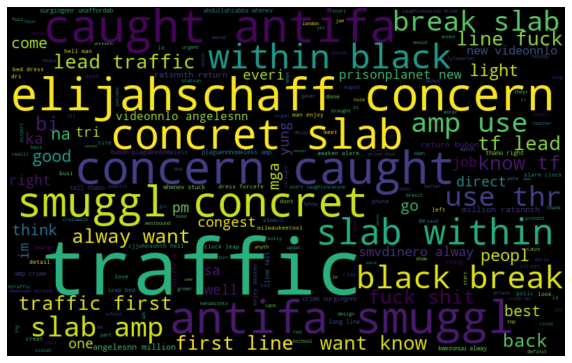

In [157]:
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in dataframe['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


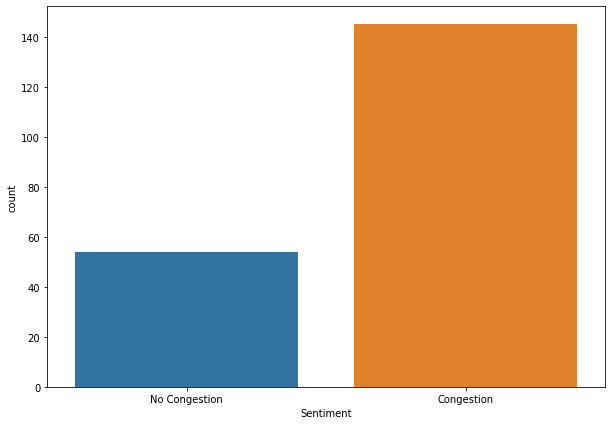

In [158]:
from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'No Congestion'
    elif analysis.sentiment.polarity ==0:
        return 'Congestion'
    else:
        return 'Congestion'

dataframe['Sentiment'] = dataframe['text'].apply(lambda x: analyze_sentiment(x))

import seaborn as sns

plt.figure(figsize=(10, 7))
sns.countplot(x = 'Sentiment', data = dataframe)
plt.show()

In [189]:
dataframe.head()


,Unnamed: 0,X.1,X,fullname,html,is_retweet,likes,replies,retweet_id,retweeter_userid,retweeter_username,retweets,text,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,emotion
0,1,1,1,Metrobus Info,"<p class=""TweetTextSize js-tweet-text tweet-te...",0,1,0,NaN,NaN,NaN,0,final e delay buse oper close schedul follow e...,4/29/2019 23:54,1556582086,1.123010e+18,/Metrobusinfo/status/1123012782222299136,1.522465e+09,Metrobusinfo,no congestion
1,2,2,2,LaGuardia Airport,"<p class=""TweetTextSize js-tweet-text tweet-te...",0,0,0,NaN,NaN,NaN,0,apolog inconveni michael use shuttl buse reduc...,4/29/2019 23:54,1556582086,1.123010e+18,/LGAairport/status/1123012780989263872,2.344256e+08,LGAairport,no congestion
2,3,3,3,Australian Traffic Network WA,"<p class=""TweetTextSize js-tweet-text tweet-te...",0,0,0,NaN,NaN,NaN,0,jandakot traffic congest northbound berrigan d...,4/29/2019 23:49,1556581787,1.123010e+18,/GettrafficWA/status/1123011527458545666,1.388619e+09,GettrafficWA,no congestion
3,4,4,4,ââââââJohnno âââââââ,"<p class=""TweetTextSize js-tweet-text tweet-te...",0,0,0,NaN,NaN,NaN,0,much relax place without bollard traffic conge...,4/29/2019 23:39,1556581198,1.123010e+18,/Austcracker/status/1123009057256685569,7.619210e+17,Austcracker,no congestion
4,5,5,5,Metrobus Info,"<p class=""TweetTextSize js-tweet-text tweet-te...",0,1,0,NaN,NaN,NaN,0,final aa delay buse oper close schedul follow ...,4/29/2019 23:35,1556580922,1.123010e+18,/Metrobusinfo/status/1123007899528130561,1.522465e+09,Metrobusinfo,no congestion


In [48]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(dataframe['text'])



In [196]:
import numpy as np
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(1,2))
vectorized_data = count_vectorizer.fit_transform(dataframe['text'])
indexed_data = hstack((np.array(range(0,vectorized_data.shape[0]))[:,None], vectorized_data))
print(indexed_data.head(10))
def sentiment2target(sentiment):
    return {
        'congestion': 1,
        'no congestion' : 0
    }[sentiment]

targets = dataframe['emotion'].apply(sentiment2target)

from sklearn.model_selection import train_test_split
data_train, data_test, targets_train, targets_test = train_test_split(indexed_data, targets, test_size=0.2, random_state=0)
data_train_index = data_train[:,0]
data_train = data_train[:,1:]
data_test_index = data_test[:,0]
data_test = data_test[:,1:]


from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(svm.SVC(gamma=0.01, C=100., probability=True, class_weight='balanced', kernel='linear'))
clf_output = clf.fit(data_train, targets_train)

print(clf.score(data_test, targets_test))


 

0.8289183222958058


array([0, 0, 0, 0], dtype=int64)

In [201]:
sentences = count_vectorizer.transform([
    "he is a bad boy!",
    "Traffic is so much!",
    "There is good traffic here",   
    "this is very nice traffic",
    "I'm coming on time traffic was not a problem"
])

clf.predict_proba(sentences)

clf.predict(sentences)



array([1, 1, 0, 0, 0], dtype=int64)